<a href="https://colab.research.google.com/github/Vinishaa-ramesh/crop_recommendation_system/blob/main/crop_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas_profiling
import pandas as pd
import pandas_profiling as pp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import plotly.graph_objects as go
import plotly.io as pio
import pickle
from sklearn.utils import resample

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 92.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 80.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=e2b2e07310cde894afe9508e3611c98abb354dfc9342a0

<ipython-input-3-3085da446084>:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, roc_curve

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.pipeline import Pipeline, make_pipeline

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, LabelEncoder

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

warnings.filterwarnings('ignore')


sns.set_style("whitegrid", {'axes.grid' : False})
pio.templates.default = "plotly_white"

In [ ]:
def explore_data(df):
    print("Number of Instances and Attributes:", df.shape)
    print('\n')
    print('Dataset columns:',df.columns)
    print('\n')
    print('Data types of each columns: ', df.info())
def checking_removing_duplicates(df):
    count_dups = df.duplicated().sum()
    print("Number of Duplicates: ", count_dups)
    if count_dups >= 1:
        df.drop_duplicates(inplace=True)
        print('Duplicate values removed!')
    else:
        print('No Duplicate values')

In [ ]:
def read_in_and_split_data(data, target):
    X = data.drop(target, axis=1)
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    return X_train, X_test, y_train, y_test

def GetModel():
    Models = []
    Models.append(('PR', LinearRegression()))
    Models.append(('LDA', LinearDiscriminantAnalysis()))
    Models.append(('KNN', KNeighborsClassifier()))
    Models.append(('ID3', DecisionTreeClassifier()))
    Models.append(('SVM', SVC(probability=True)))
    Models.append(('ANN', MLPClassifier()))
    return Models

def ensemblemodels():
    ensembles = []
    ensembles.append(('AB', AdaBoostClassifier()))
    ensembles.append(('GBM', GradientBoostingClassifier()))
    ensembles.append(('RF', RandomForestClassifier()))
    ensembles.append(('Bagging', BaggingClassifier()))
    ensembles.append(('ET', ExtraTreesClassifier()))
    return ensembles

def fit_model(X_train, y_train, models):
    num_folds = 10
    scoring = 'accuracy'
    results = []
    names = []
    for name, model in models:
        kfold = KFold(n_splits=num_folds, shuffle=True, random_state=0)
        if name == 'PR':
            # create polynomial features
            poly = PolynomialFeatures(degree=2)
            X_poly_train = poly.fit_transform(X_train)
            X_poly_test = poly.transform(X_test)
            model.fit(X_poly_train, y_train)
            y_pred = model.predict(X_poly_test)
        else:
            # fit model
            cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
            results.append(cv_results)
            names.append(name)
            print(f"{name}: {cv_results.mean()} ({cv_results.std()})")
    return results, names


Training Accuracy Score: 99.2%
Validation Accuracy Score: 98.9%
Accuracy: 0.990909090909091
Precision: 0.990909090909091
Recall: 0.990909090909091
F1 Score: 0.990909090909091


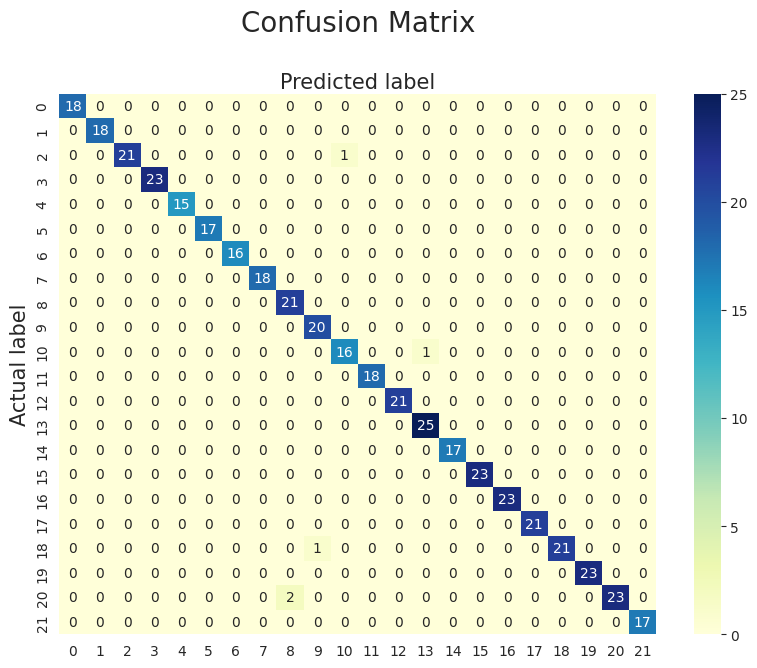

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      0.95      0.98        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       0.91      1.00      0.95        21
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.94      0.94      0.94        17
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.96      1.00      0.98        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [ ]:
def save_model(model,filename):
    pickle.dump(model, open(filename, 'wb'))

def classification_metrics(model, conf_matrix):
    print(f"Training Accuracy Score: {model.score(X_train, y_train) * 100:.1f}%")
    print(f"Validation Accuracy Score: {model.score(X_test, y_test) * 100:.1f}%")
    fig,ax = plt.subplots(figsize=(8,6))
    sns.heatmap(pd.DataFrame(conf_matrix), annot = True, cmap = 'YlGnBu',fmt = 'g')
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title('Confusion Matrix', fontsize=20, y=1.1)
    plt.ylabel('Actual label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    plt.show()
    print(classification_report(y_test, y_pred))
df = pd.read_csv( r'/content/sample_data/Crop_recommendation.csv')


Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

target ='Crop'
X_train, X_test, y_train, y_test = read_in_and_split_data(df, target)

pipeline = make_pipeline(StandardScaler(),  MLPClassifier())
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test,y_pred)
classification_metrics(pipeline, conf_matrix)

save_model(model, 'model.pkl')

In [ ]:
explore_data(df)

Number of Instances and Attributes: (2200, 8)


Dataset columns: Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH',
       'Rainfall', 'Crop'],
      dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH           2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
Data types of each columns:  None


In [ ]:
checking_removing_duplicates(df)

Number of Duplicates:  0
No Duplicate values


In [ ]:
x_test_1=[['10','48','39','7.28209415','80.30025587','0.042299069','291.0863347']]
y_pred_1 = model.predict(x_test_1)
y_pred_1


array(['pigeonpeas'], dtype='<U11')

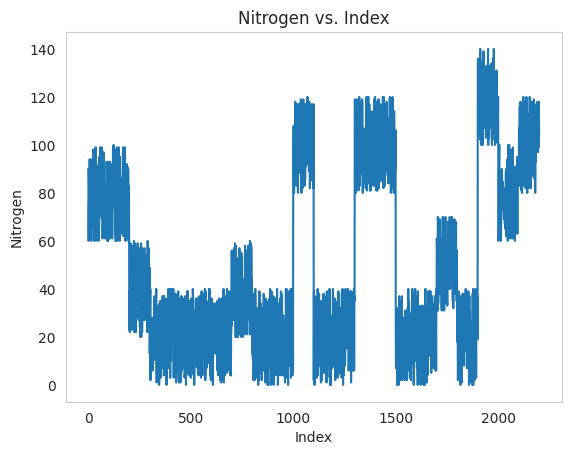

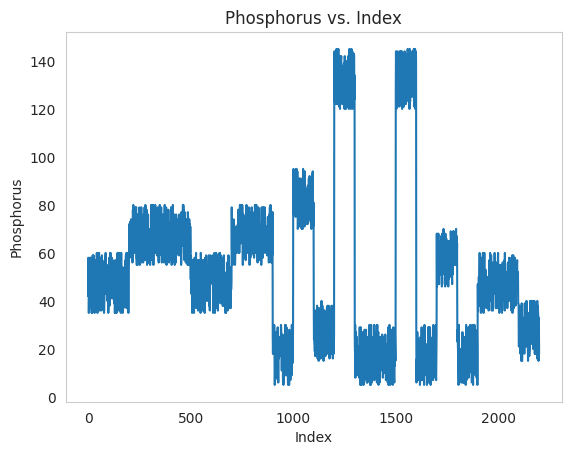

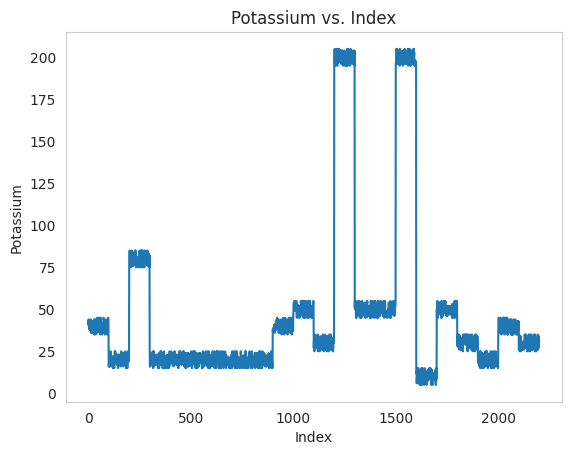

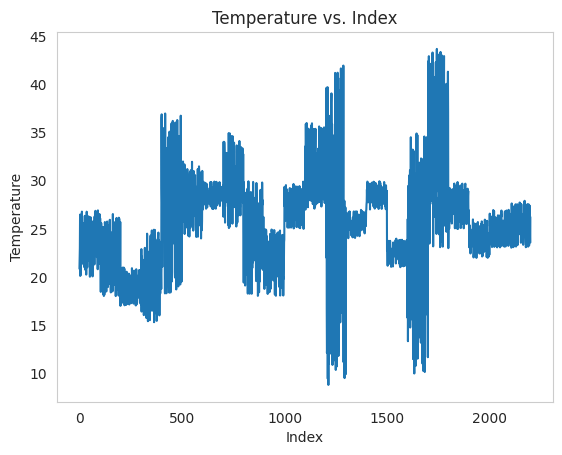

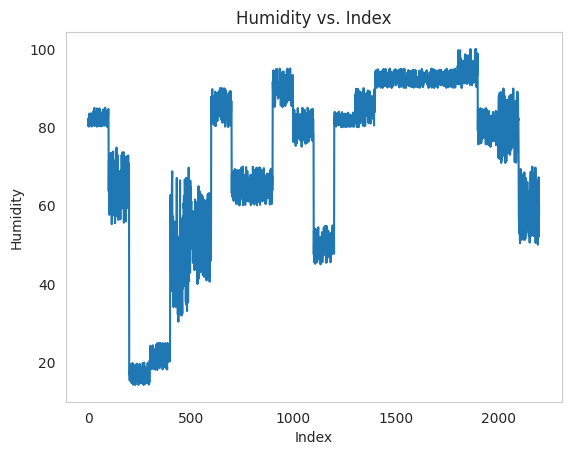

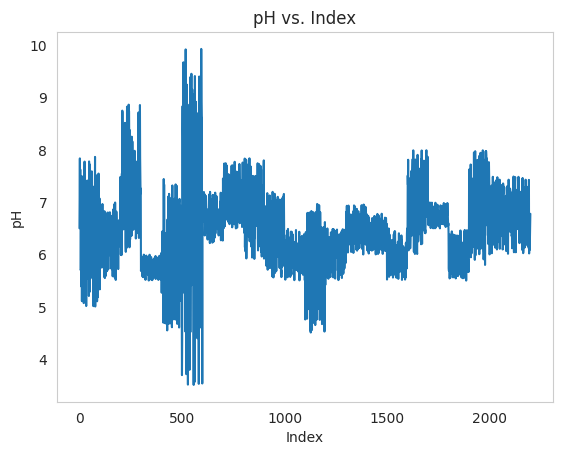

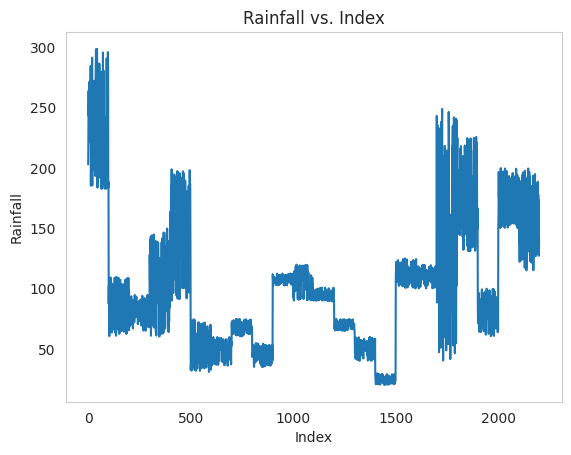

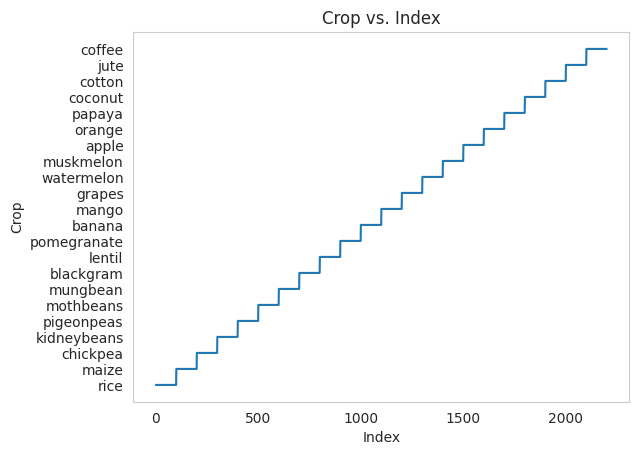

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Import dataset
df = pd.read_csv(r'/content/sample_data/Crop_recommendation.csv')

# Get list of all columns
columns = df.columns.tolist()

# Plot each feature
for column in columns:
    plt.plot(df[column])
    plt.xlabel("Index")
    plt.ylabel(column)
    plt.title(f"{column} vs. Index")
    plt.show()


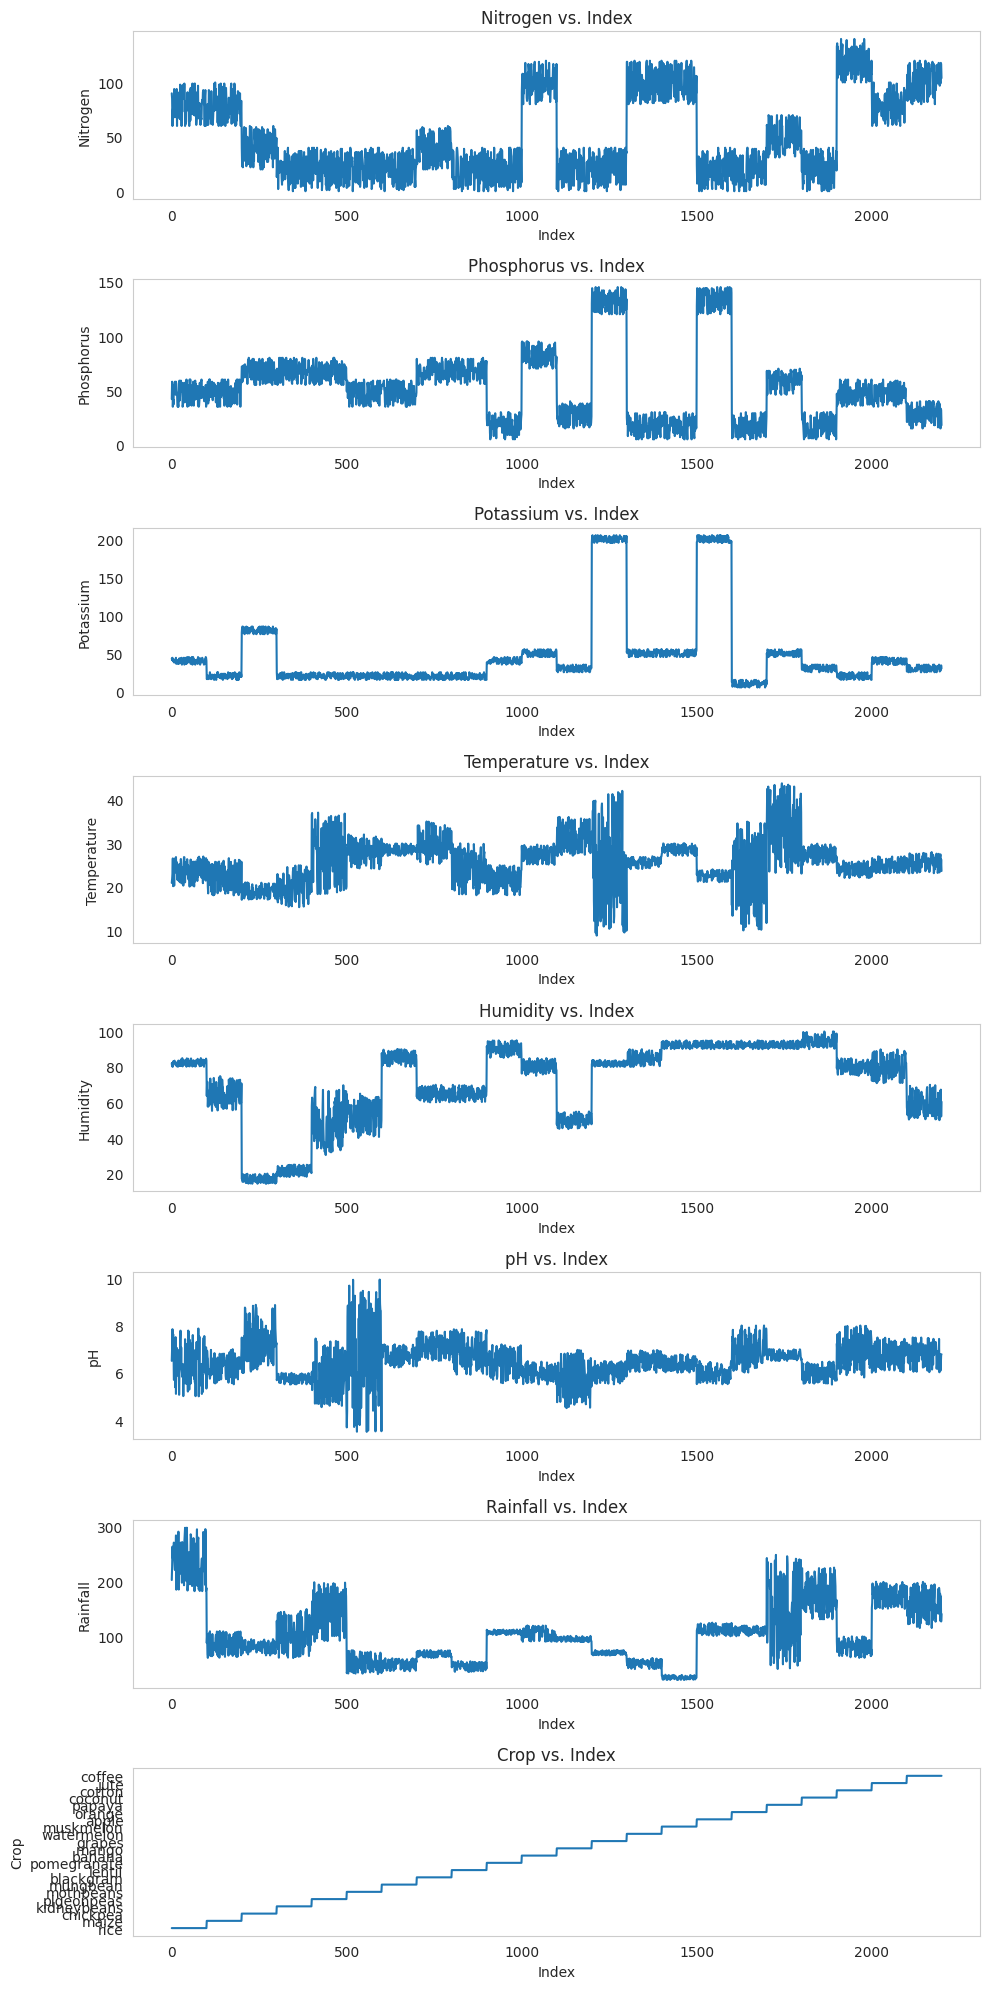

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Import datasetZ
df = pd.read_csv(r'/content/sample_data/Crop_recommendation.csv')
# import pandas as pd
# import matplotlib.pyplot as plt

# # Import dataset
# df = pd.read_csv("Crop_recommendation.csv")

# Get list of all columns
columns = df.columns.tolist()

# Create a figure with subplots
fig, axs = plt.subplots(len(columns), 1, figsize=(10, 20))

# Plot each feature in a subplot
for i, column in enumerate(columns):
    axs[i].plot(df[column])
    axs[i].set_xlabel("Index")
    axs[i].set_ylabel(column)
    axs[i].set_title(f"{column} vs. Index")

# Adjust spacing and display the plot
fig.tight_layout()
plt.show()


In [ ]:
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# assume y_true and y_pred are the ground truth and predicted labels, respectively
# for a binary classification problem

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# calculate precision
precision = precision_score(y_test, y_pred, average='micro')

# calculate recall
recall = recall_score(y_test, y_pred, average='micro')

# calculate F1 score
f1 = f1_score(y_test, y_pred, average='micro')

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(cm)


Accuracy: 0.990909090909091
Precision: 0.990909090909091
Recall: 0.990909090909091
F1 Score: 0.990909090909091
Confusion Matrix:
[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
df=pd.read_csv(r'/content/Crop_recommendation.csv')

#  Models.append(('PR', LinearRegression()))
#     Models.append(('LDA', LinearDiscriminantAnalysis()))
#     Models.append(('KNN', KNeighborsClassifier()))
#     Models.append(('ID3', DecisionTreeClassifier()))
#     Models.append(('SVM', SVC(probability=True)))
#     Models.append(('ANN', MLPClassifier()))

model = MLPClassifier()

X=df.iloc[:,:-1]
y=df.iloc[:,-1]
# target="Crop"
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

modelx = model.fit(X_train, y_train)
y_pred = modelx.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9613636363636363
Precision: 0.9613636363636363
Recall: 0.9613636363636363
F1 Score: 0.9613636363636363
Confusion Matrix:
[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 16  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 2